In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('train.csv')
Y = train.Price
test = pd.read_csv('test.csv')

In [5]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
Y.describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [8]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
train = train.drop('Healthcare_1', axis=1)
train.loc[train.HouseYear==20052011,'HouseYear']=2011
train.loc[train.HouseYear==4968,'HouseYear']=1968
train.loc[train.Rooms == 0, 'Rooms'] = 1
train.loc[train.Rooms > 5, 'Rooms'] = 5

In [10]:
test = test.drop('Healthcare_1', axis=1)

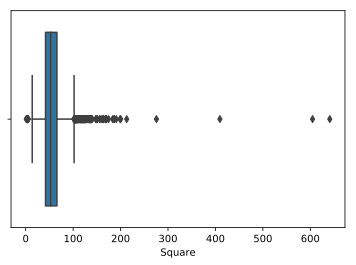

In [11]:
sns.boxplot(train.Square)

In [12]:
train[train.Square > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


In [13]:
train.loc[4262, 'Square'] = train.loc[4262, 'Square'] / 10
train.loc[4690, 'Square'] = train.loc[4690, 'Square'] / 10
train.loc[6977, 'Square'] = train.loc[6977, 'Square'] / 10

In [14]:
def prepare_lifesquare(df, square_lifesquare):
    df.LifeSquare = df['LifeSquare'].fillna(train['Square']/square_lifesquare)
    df.loc[df.LifeSquare > df.Square, 'LifeSquare'] = df.Square / square_lifesquare
    df.loc[df.LifeSquare < 20, 'LifeSquare'] = df.Square / square_lifesquare
    return df
def prepare_kitchen(df):
    df.loc[df.KitchenSquare > df.Square - df.LifeSquare, 'KitchenSquare'] = df.Square - df.LifeSquare
    return df
def prepare_housefloor(df):
    df.loc[df.Floor > df.HouseFloor, 'Floor'] = df.HouseFloor
    df.loc[df.Floor == 0, 'Floor'] = 1
    return df
def prepare_year(df):
    df.HouseYear = df.HouseYear.map(lambda x: int(x/10) *10)
    return df
def dummies(df,dummy_features):
    for feature in dummy_features:
        df[feature]=df[feature].astype(object)
    df=pd.get_dummies(df)
    return df
def prepare_rooms(df, room_square):
    df.loc[df.Rooms == 0, 'Rooms'] = 1
    df.loc[df.Rooms>5, 'Rooms'] = round(df['Square'] / room_square)
    return df
def prepare_square(df, room_square):
    df.loc[df['Square']> 300,'Square']=df['Rooms']*room_square+20
    df.loc[df['Square']<(df['Rooms']*15),'Square']=df['Rooms']*15
    return df
def add_distr_info(df,distr_info1, distr_info2, distr_price_mean):
    df = pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['large_district'] = df['large_district'].fillna(1)
    df = pd.merge(df, distr_info2, on='DistrictId', how='left')
    df.distr_price = df.distr_price.fillna(distr_price_mean)
    return df
def prepare(df, room_square_mean, square_lifesquare, distr_info1, distr_info2, distr_price_mean, dummy_features):
    df = prepare_rooms(df, room_square_mean)
    df = prepare_square(df, room_square_mean)
    df = prepare_lifesquare(df, square_lifesquare)
    df = prepare_kitchen(df)
    df = prepare_housefloor(df)
    df = add_distr_info(df, distr_info1, distr_info2, distr_price_mean)
    df = prepare_year(df)
    df = dummies(df, dummy_features)
    return df

In [15]:
room_square_mean = (train.Square / train.Rooms).mean()
room_square_mean

32.44635114404573

In [16]:
square_lifesquare = (train.Square / train.LifeSquare).median()
square_lifesquare

1.6193623907835522

In [17]:
price_square_mean = (train.Price / train.Square).mean()
price_square_mean

3989.0494983638473

In [18]:
distr_info1 = train['DistrictId'].value_counts().reset_index().rename(
    columns=({'DistrictId':'large_district','index':'DistrictId'}))

In [19]:
dummy_features = ['HouseYear', ]

In [20]:
train['square_price'] = train.Price / train.Square
distr_info2 = train[['square_price', 'DistrictId']].groupby('DistrictId').mean().reset_index().rename(
    columns=({'index': 'DistrictId', 'square_price': 'distr_price'}))
train = train.drop('square_price', axis=1)
train = train.drop('Price', axis=1)
distr_price_mean = distr_info2.distr_price.mean()
distr_price_mean

4853.367424513857

In [21]:
train = prepare(train, room_square_mean, square_lifesquare, distr_info1, distr_info2, distr_price_mean, dummy_features)
test = prepare(test, room_square_mean, square_lifesquare, distr_info1, distr_info2, distr_price_mean, dummy_features)

In [22]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,...,HouseYear_1990,HouseYear_2000,HouseYear_2010,HouseYear_2020,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.888800,56.214709,36.121569,5.570259,7.727300,12.609400,0.118858,24.687000,...,0.069500,0.085700,0.17230,0.00190,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.813819,19.096244,14.392978,4.056999,5.267344,6.775974,0.119025,17.532614,...,0.254315,0.279935,0.37766,0.04355,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,1.000000,15.000000,9.262905,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.784623,25.159939,1.000000,4.000000,9.000000,0.017647,6.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.535436,32.996523,6.000000,7.000000,13.000000,0.075424,25.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.925548,43.907713,8.000000,11.000000,17.000000,0.195781,36.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,5.000000,275.645284,233.949309,47.208670,42.000000,117.000000,0.521867,74.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
test = test.loc[:, train.columns]

In [24]:
scaler = MinMaxScaler()
train_id = train.Id
test_id = test.Id
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)
train.Id = train_id
test.Id = test_id

In [25]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,...,HouseYear_1990,HouseYear_2000,HouseYear_2010,HouseYear_2020,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,0.277512,0.25,0.133832,0.107572,0.127095,0.121951,0.119658,0.594403,0.148649,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,15856,0.354067,0.25,0.208188,0.139299,0.021183,0.000000,0.008547,0.145207,0.081081,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,5480,0.909091,0.00,0.000000,0.000000,0.121526,0.024390,0.042735,0.000000,0.405405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,15664,0.224880,0.25,0.222703,0.189944,0.190643,0.512195,0.188034,0.195208,0.310811,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,14275,0.129187,0.00,0.124795,0.151877,0.021183,0.390244,0.145299,0.138268,0.027027,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [26]:
pca = PCA( n_components=1, random_state=42)
train['social_shops'] = pca.fit_transform(train.loc[:, ['Social_1', 'Shops_1']])
test['social_shops'] = pca.transform(test.loc[:, ['Social_1', 'Shops_1']])

In [27]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'large_district', 'distr_price',
       'HouseYear_1910', 'HouseYear_1920', 'HouseYear_1930', 'HouseYear_1940',
       'HouseYear_1950', 'HouseYear_1960', 'HouseYear_1970', 'HouseYear_1980',
       'HouseYear_1990', 'HouseYear_2000', 'HouseYear_2010', 'HouseYear_2020',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'social_shops'],
      dtype='object')

In [28]:
features = ['Square', 'LifeSquare', 'KitchenSquare', 'Rooms',
            'Floor', 'HouseFloor', 'Ecology_1', 'Social_3',
            'Helthcare_2', 'large_district',
            'HouseYear_1950', 'HouseYear_1960', 'HouseYear_1970',
            'HouseYear_1980', 'HouseYear_1990', 'HouseYear_2000', 'HouseYear_2010',
            'social_shops', 'distr_price']

In [29]:
params = {
    'min_samples_leaf':[3, 5, 7, 10], 
    'n_estimators':[25, 50, 75, 100], 
    'max_depth':[3, 5, 7, 10],}
regr = GridSearchCV(RFR(),param_grid=params,cv=2, n_jobs=-1)

In [30]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,...,HouseYear_2000,HouseYear_2010,HouseYear_2020,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,social_shops
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,8383.40770,0.241152,0.222200,0.158126,0.119538,0.117992,0.164080,0.107773,0.227754,0.333608,...,0.085700,0.17230,0.00190,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500,-4.431178e-17
std,4859.01902,0.208553,0.203455,0.073265,0.064058,0.085938,0.128472,0.057914,0.228076,0.236927,...,0.279935,0.37766,0.04355,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139,2.769352e-01
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.758568e-01
25%,4169.50000,0.095694,0.000000,0.102763,0.070752,0.021183,0.073171,0.076923,0.033815,0.081081,...,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-2.583407e-01
50%,8394.50000,0.172249,0.250000,0.144010,0.105630,0.127095,0.146341,0.111111,0.144527,0.337838,...,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-2.908605e-03
75%,12592.50000,0.358852,0.250000,0.195383,0.154192,0.169460,0.243902,0.145299,0.375155,0.486486,...,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.513298e-01
max,16798.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.131727e-01


In [31]:
%%time 
regr.fit(train.loc[:, features], Y)

CPU times: user 2.58 s, sys: 145 ms, total: 2.73 s
Wall time: 18.8 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'n_estimators': [25, 50, 75, 100], 'max_depth': [3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
regr.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 75}

In [33]:
regr.best_score_

0.7425383140444719

In [34]:
regressor  = RFR(max_depth=10, min_samples_leaf=3, n_estimators=75, n_jobs=-1)

In [35]:
regressor.fit(train.loc[:, features], Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
df = pd.DataFrame(zip(features, regressor.feature_importances_), columns=['param', 'score'])
df = df.sort_values(by='score', ascending=False)
df['score'] = df['score'].round(4)
df

,param,score
0,Square,0.4585
18,distr_price,0.3617
3,Rooms,0.0339
17,social_shops,0.0244
1,LifeSquare,0.0192
7,Social_3,0.0146
6,Ecology_1,0.0140
2,KitchenSquare,0.0137
9,large_district,0.0134
5,HouseFloor,0.0128


In [37]:
test['Price'] = regressor.predict(test.loc[:, features])
test.Price.describe()

count      5000.000000
mean     214942.186309
std       79426.268910
min       65319.562000
25%      164938.540103
50%      193418.973006
75%      246221.710909
max      579906.561226
Name: Price, dtype: float64

In [38]:
test[['Id','Price']].to_csv('KKrasov_predictions.csv',index=None)